# Project: Writing a Data Scientists Blog Post

In this notebook I will be using sklearn and other ML learning libraries to analyse survey results.

# 1. Importing the data

In [2]:
import pandas as pd
import os
import glob
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
def load_year_from_csv(year):
    # defining the directory
    directory_path = os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    try:
        df = pd.read_csv(csv_files[0], sep=',', encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")

    return df

# creating a list of all the years we want to analise
years = ['2024', '2023', '2022',
    	 '2021', '2020', '2019']

data = []

for year in years:
    print('loading data for: ', year)
    data.append(load_year_from_csv(year));

loading data for:  2024
loading data for:  2023
loading data for:  2022
loading data for:  2021
loading data for:  2020
loading data for:  2019


In [4]:
# Verify that both lists have the same length
assert len(years) == len(data), "The lists must have the same length"

# Pair each string with its corresponding DataFrame
paired_list = zip(years, data)

# Convert the paired list to a dictionary
data_dict_raw = dict(paired_list)

# 2. Assessing the Survey compability over the years

In order to get an overview of the consistency of the survey over the years, we want to identify common questions and similarities over the years. With this information we can narrow down the timeframe for our most relevant questions.

In [5]:
def bar_column_names(df_dict, years):   
    '''
    INPUT - df_dict - dictionary containing dataframes for multiple years of the survey
            years - list of strings containing the years relevant for the plots
    OUTPUT - 
            bar chart of the most common column names in all years
    '''
    # Extract column names
    column_names = {year: set(data.columns) for year, data in df_dict.items()}

    # Find columns common to all DataFrames
    common_columns = set.intersection(*column_names.values())

    # Extract column names for the selected years
    all_columns_selected_years = []
    for year in years:
        if year in df_dict:
            all_columns_selected_years.extend(df_dict[year].columns)

    # # Remove duplicates by converting the list to a set and back to a list
    # all_columns_selected_years = list(set(all_columns_selected_years))

    # Count the frequency of each column name
    column_counter_selected_years = Counter(all_columns_selected_years)

    # Select the 20 most common columns between the years of the survey
    top_30_columns = column_counter_selected_years.most_common(30)

    # Separate keys and values for plotting
    labels, values = zip(*top_30_columns)

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Items')
    plt.title('Top 20 Items in Counter')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest count at the top
    plt.tight_layout()
    plt.show()

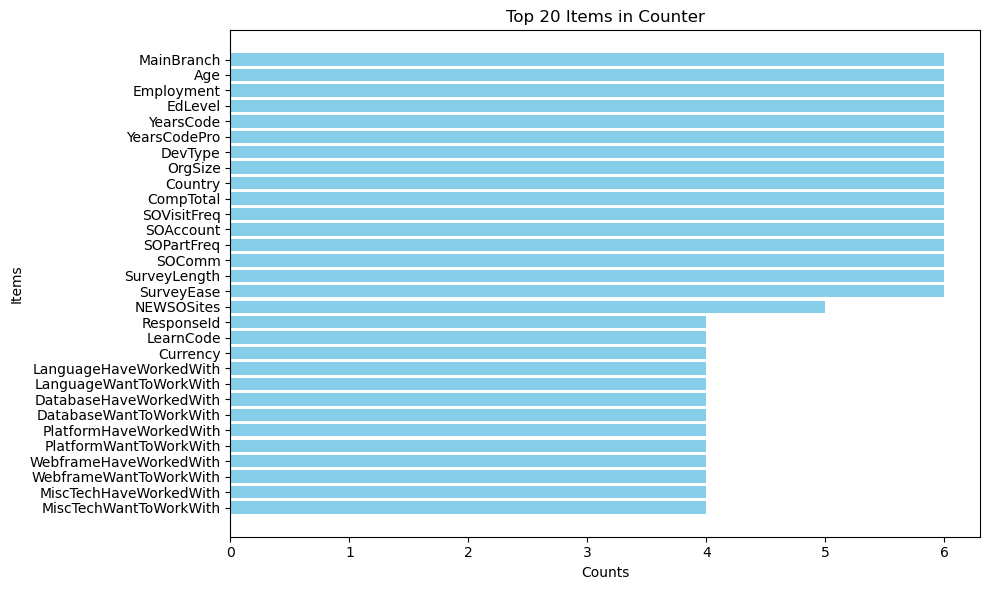

In [6]:
# Define the years for which you want to extract column names
selected_years = years[:]

# plot a bar chart of the most common column names
bar_column_names(data_dict_raw, selected_years)

In [7]:
data_dict = data_dict_raw

# renaming interesting columns in the 2020 dataframe for consistency over the years
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# renaming interesting columns in the 2019 dataframe for consistency over the years
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# # renaming interesting columns in the 2018 dataframe for consistency over the years
# data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
# data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

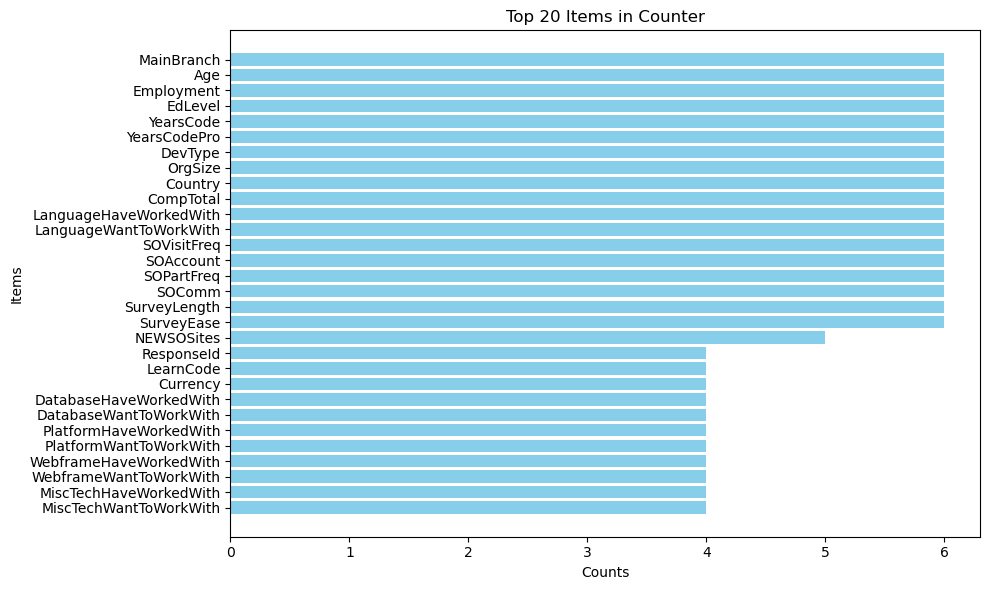

In [8]:
# plot a bar chart of the most common column names
bar_column_names(data_dict, selected_years)

In [9]:
# check which years yield a certain column name
NamesToCheck = ['Country', 'Employment', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Age', 'Currency', 'Gender', 'MainBranch', 'EdLevel', 'OrgSize', 'YearsCode', 'YearsCodePro', 'CompTotal', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm']

for Name in NamesToCheck:
    print(Name + ': ')
    sumForName = 0
    for year in data_dict:
        if sum(data_dict[year].columns == Name):
            # print(year)
            sumForName += 1
        else:
            print('Missing: ' + year)
            
    print(sumForName)


Country: 
6
Employment: 
6
DevType: 
6
LanguageHaveWorkedWith: 
6
LanguageWantToWorkWith: 
6
Age: 
6
Currency: 
Missing: 2020
Missing: 2019
4
Gender: 
Missing: 2024
Missing: 2023
4
MainBranch: 
6
EdLevel: 
6
OrgSize: 
6
YearsCode: 
6
YearsCodePro: 
6
CompTotal: 
6
SOVisitFreq: 
6
SOAccount: 
6
SOPartFreq: 
6
SOComm: 
6


In [10]:
# dimensions of the data
for year, df in data_dict.items():
    print(year + ' survey size: ')
    print(df.shape[0])

2024 survey size: 
65437
2023 survey size: 
89184
2022 survey size: 
73268
2021 survey size: 
83439
2020 survey size: 
64461
2019 survey size: 
88883


In [11]:
# Concatenate the df's into a single one and adding a year column
survey_list = []

for year, df in data_dict.items():
    df['Year'] = year
    survey_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(survey_list, ignore_index=True)


In [12]:
combined_df.shape

(464672, 224)

# 3. CRISP-DM Process
At this point we gained a little bit of an understanding of the survay variation over time and definied a timeframe in which we can use the survey effectively. Now we can implement the CRIPS-DM Process.


## 3.1 Business Understanding
The first step in the process is the build up of business understanding. We need to formulate questions to tackle.


#### QUESTION 1:
Which programming languages are most commonly used and which trends can be inferred from this data.

#### QUESTION 2:
Which programming languages were overhyped. In the sense of high interest to be worked with in the future in relation to use in the following years.

#### QUESTION 3:
Which programming languages have a strong comunity on stack overflow.

#### QUESTION 4:
Are there programming language preferences inbetween branches. Are tides shifting in this context.




In [13]:
# Check the percentile of NaN's for different columns
nanLess25 = set(combined_df.columns[combined_df.isnull().mean() < 0.25])
print(nanLess25)

{'DevType', 'LanguageHaveWorkedWith', 'Country', 'Employment', 'SurveyLength', 'LanguageWantToWorkWith', 'EdLevel', 'SOComm', 'YearsCodePro', 'NEWSOSites', 'MainBranch', 'YearsCode', 'SOPartFreq', 'SurveyEase', 'Age', 'Year', 'SOAccount', 'SOVisitFreq'}


In [14]:
combined_df.groupby('Year')['ResponseId'].mean()

Year
2019        NaN
2020        NaN
2021    41720.0
2022    36634.5
2023    44592.5
2024    32719.0
Name: ResponseId, dtype: float64

In [18]:
combined_df.groupby('Year')['LanguageHaveWorkedWith'].value_counts()


Year  LanguageHaveWorkedWith               
2019  HTML/CSS;JavaScript;PHP;SQL              1483
      C#;HTML/CSS;JavaScript;SQL               1414
      HTML/CSS;JavaScript                      1247
      C#;HTML/CSS;JavaScript;SQL;TypeScript     990
      Java                                      934
                                               ... 
2024  Solidity;SQL;TypeScript                     1
      Solidity;TypeScript;Zephyr                  1
      Swift;VBA                                   1
      TypeScript;VBA                              1
      Zephyr                                      1
Name: count, Length: 144617, dtype: int64

In [25]:
# get value counts for entrys to LanguageHaveWorkedWith for a given year
combined_df[combined_df['Year']=='2020']['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                         1073
HTML/CSS;JavaScript                                                                  900
C#;HTML/CSS;JavaScript;SQL                                                           856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                754
HTML/CSS;JavaScript;TypeScript                                                       697
                                                                                    ... 
Bash/Shell/PowerShell;Go;Java;JavaScript;SQL                                           1
C;C#;HTML/CSS;PHP;Python;SQL                                                           1
Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;Kotlin;R;SQL                         1
Bash/Shell/PowerShell;C;C#;C++;Java;Ruby;SQL                                           1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       

In [40]:
# get ratio of people using a certai Languae for a given year
def get_Language_ratio(year, language):
    '''
    INPUT - year - string of the Year to be investigated
            language - string of programming language to be investigated 
    OUTPUT - 
            ratio - float of ratio of people which have used the language 
    '''
    ratio = (combined_df[combined_df['Year']==year]\
            ['LanguageHaveWorkedWith'].str.contains(language, regex=False).sum())\
            / (combined_df[combined_df['Year']==year].shape[0])
    
    return ratio

In [54]:
year = str(2023)
language = 'Python'

get_Language_ratio(year, language)

0.48392088266953714